<a href="https://colab.research.google.com/github/GiliardGodoi/learning/blob/main/PyTorch/00_quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quickstart

Referências:
1. <https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html>
2. <https://pytorch.org/tutorials/beginner/basics/data_tutorial.html>

In [1]:
from matplotlib import pyplot as plt

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:02<00:00, 8959187.62it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 149463.25it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2817014.89it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8260243.68it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



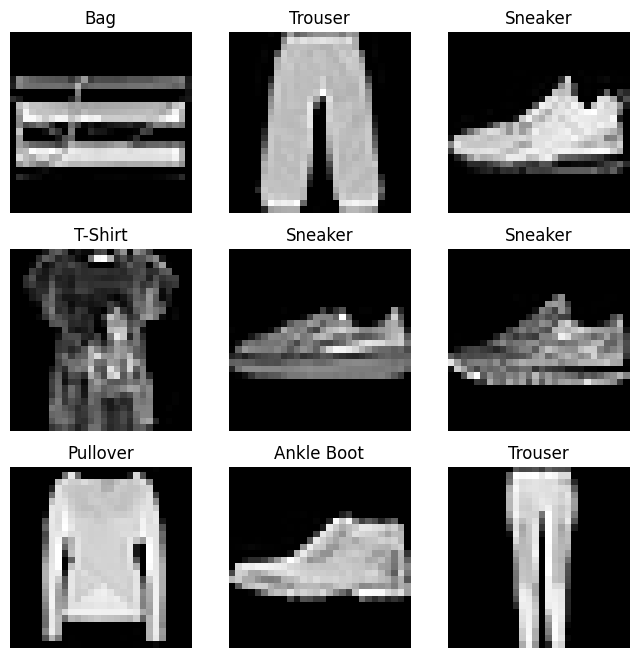

In [4]:
label_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

fig = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]

    fig.add_subplot(rows, cols, i)
    plt.title(label_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")


In [5]:
batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W] : {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W] : torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [6]:
device = (
    'cuda'
    if torch.cuda.is_available()
    else 'mps'
    if torch.backends.mps.is_available()
    else 'cpu'
)

device

'cuda'

In [7]:
class NeuralNetwork(nn.Module):

    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)

        return logits

In [8]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # compute predictions error
        predictions = model(X)
        loss = loss_fn(predictions, y)

        # backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X) * len(X[0])
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [9]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)

    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            predictions = model(X)
            test_loss += loss_fn(predictions, y).item()
            correct += (predictions.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100 * correct):>0.1f}%, Avg loss: {test_loss:>8f}\n")

In [10]:
model = NeuralNetwork().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

epochs = 10

for t in range(epochs):
    print(f"Epoch {t + 1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)

print("Done!")

Epoch 1
-------------------------------
loss: 2.294995  [    0/60000]
loss: 2.285068  [ 6400/60000]
loss: 2.271847  [12800/60000]
loss: 2.271696  [19200/60000]
loss: 2.244425  [25600/60000]
loss: 2.216318  [32000/60000]
loss: 2.228523  [38400/60000]
loss: 2.199887  [44800/60000]
loss: 2.199944  [51200/60000]
loss: 2.159282  [57600/60000]
Test Error: 
 Accuracy: 44.8%, Avg loss: 2.160146

Epoch 2
-------------------------------
loss: 2.172801  [    0/60000]
loss: 2.160967  [ 6400/60000]
loss: 2.110201  [12800/60000]
loss: 2.126361  [19200/60000]
loss: 2.068755  [25600/60000]
loss: 2.011927  [32000/60000]
loss: 2.045473  [38400/60000]
loss: 1.974840  [44800/60000]
loss: 1.981900  [51200/60000]
loss: 1.892722  [57600/60000]
Test Error: 
 Accuracy: 53.7%, Avg loss: 1.897439

Epoch 3
-------------------------------
loss: 1.935811  [    0/60000]
loss: 1.901854  [ 6400/60000]
loss: 1.788316  [12800/60000]
loss: 1.826089  [19200/60000]
loss: 1.711932  [25600/60000]
loss: 1.660475  [32000/60000

In [11]:
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [12]:
torch.save(model.state_dict(), 'model.pth')

In [13]:
model2 = NeuralNetwork().to(device)
model2.load_state_dict(torch.load('model.pth'))

<All keys matched successfully>

In [14]:
classes = [v for v in label_map.values() ]
print(classes)

['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']


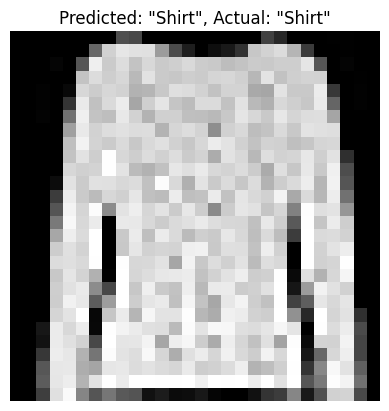

In [15]:
index = 89 # @param {type : 'number'}

model2.eval()
x, y = test_data[index][0], test_data[index][1]
with torch.no_grad():
    x = x.to(device)
    pred = model2(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]

    plt.title(f'Predicted: "{predicted}", Actual: "{actual}"')
    plt.imshow(x.cpu().squeeze(), cmap='gray')
    plt.axis('off')

# Tensors

Referências:
1. <https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html>
2. <https://pytorch.org/docs/stable/torch.html>

In [16]:
import torch
import numpy as np

In [17]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

x_data

tensor([[1, 2],
        [3, 4]])

In [18]:
# from numpy
np_array = np.array(data)

x_np = torch.from_numpy(np_array)

x_np

tensor([[1, 2],
        [3, 4]])

In [19]:
# From another tensor

x_ones = torch.ones_like(x_data)

x_ones

tensor([[1, 1],
        [1, 1]])

In [20]:
x_rand = torch.rand_like(x_data, dtype=torch.float)

x_rand

tensor([[0.6633, 0.4220],
        [0.2980, 0.1367]])

In [21]:
shape = (3,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)
indenty_tensor = torch.eye(3)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}\n")
print(f"Indenty Tensor: \n {indenty_tensor}")

Random Tensor: 
 tensor([[0.7360, 0.7317, 0.8756],
        [0.7332, 0.7429, 0.9742],
        [0.7505, 0.7974, 0.5196]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Indenty Tensor: 
 tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


In [22]:
tensor = torch.rand(3,4).to(device)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cuda:0


In [23]:
torch.cuda.is_available()

True

In [24]:
tensor = torch.eye(4)

print('First row: ', tensor[0])
print('Last column: ', tensor[:, -1])
print('First column: ', tensor[:, 0])
print('Last row: ', tensor[-1])
print()
tensor

First row:  tensor([1., 0., 0., 0.])
Last column:  tensor([0., 0., 0., 1.])
First column:  tensor([1., 0., 0., 0.])
Last row:  tensor([0., 0., 0., 1.])



tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

In [25]:
tensor.shape

torch.Size([4, 4])

In [26]:
tensor.squeeze()

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

In [27]:
nn.Flatten()(tensor)

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

In [28]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1.shape)
t1

torch.Size([4, 12])


tensor([[1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.]])

In [29]:
t1 = torch.cat([tensor, tensor, tensor], dim=0)
print(t1.shape)
t1

torch.Size([12, 4])


tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

In [30]:
tensor = torch.ones(4, 4)

tensor

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [31]:
tensor[:, 1] = 0

tensor

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [32]:
tensor @ tensor.T

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

In [33]:
tensor.matmul(tensor.T)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

In [34]:
z1 = torch.zeros(4, 4)

torch.matmul(tensor, tensor.T, out=z1)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

In [35]:
z1

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

In [36]:
t1 = torch.eye(3)
t2 = torch.rand(3,3)

t1 * t2

tensor([[0.7080, 0.0000, 0.0000],
        [0.0000, 0.4109, 0.0000],
        [0.0000, 0.0000, 0.3213]])

In [37]:
t1.mul(t2)

tensor([[0.7080, 0.0000, 0.0000],
        [0.0000, 0.4109, 0.0000],
        [0.0000, 0.0000, 0.3213]])

In [38]:
tensor

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [39]:
agg = tensor.sum()

agg.item(), type(agg.item())

(12.0, float)

In [40]:
t = torch.rand(5, 3)

t

tensor([[0.8381, 0.1442, 0.4157],
        [0.2932, 0.5974, 0.0107],
        [0.0641, 0.4865, 0.4180],
        [0.3983, 0.4510, 0.6719],
        [0.4241, 0.7193, 0.3564]])

In [41]:
n = t.numpy()

n

array([[0.8380543 , 0.14416748, 0.41568077],
       [0.29315072, 0.597386  , 0.01067322],
       [0.06408036, 0.4865166 , 0.41799563],
       [0.3983026 , 0.4509604 , 0.6718941 ],
       [0.42407525, 0.7193236 , 0.35641748]], dtype=float32)

In [42]:
# changes the tensor, reflects to the numpy array

t.add_(5)

n

array([[5.838054 , 5.1441674, 5.415681 ],
       [5.293151 , 5.597386 , 5.010673 ],
       [5.06408  , 5.4865165, 5.4179955],
       [5.3983026, 5.45096  , 5.671894 ],
       [5.424075 , 5.7193236, 5.3564177]], dtype=float32)

In [43]:
n = np.ones(10)

t = torch.from_numpy(n)

t

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)

In [44]:
# changes the numpy, reflects to the tensor

np.add(n, 7, out=n)

t

tensor([8., 8., 8., 8., 8., 8., 8., 8., 8., 8.], dtype=torch.float64)

In [46]:
# if the tensor was sent to the  gpu device
t = torch.ones(5).to(device)

n = t.cpu().numpy()

t.add_(-1)

n

array([1., 1., 1., 1., 1.], dtype=float32)

# Datasets and DataLoaders

In [48]:
# Creating a custom dataset for your files

import os
import pandas as pd
from torch.utils.data import Dataset
from torchvision.io import read_image

In [49]:
class CustomImageDataset(Dataset):

    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labes = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labes)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labes.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labes.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

# Transforms

In [53]:
target = lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)

t = target(5)

t

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [55]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(target)
)

In [59]:
img, label = ds[5]

img.shape, label.shape

(torch.Size([1, 28, 28]), torch.Size([10]))

In [60]:
img

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0863, 0.3451, 0.7373, 0.6745, 0.5176, 0.4902, 0.5529,
          0.7804, 0.5608, 0.0353, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0784, 0.5137,
          0.7804, 0.8078, 0.7686, 0.7922, 0.9490, 1.0000, 1.0000, 0.9804,
          0.8706, 0.7725, 0.8078, 0.7373, 0.4941, 0.0667, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.1373, 0.8392, 0.7490,
          0.7176, 0.6980, 0.6863, 0.6588, 0.5882, 0.6353, 0.6235, 0.5961,
          0.6196, 0.7020, 0.7176, 0.7412, 0.7647, 0.7255, 0.3216, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6667, 0.7451, 0.6745,
          0.6941, 0.6902, 0.6706, 0.6627, 0.6353, 0.6078, 0.5804, 0.6039,
          0.6627, 0.6824, 0.6863, 0.6863, 0.6941, 0.7176,

In [61]:
label

tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

# Build Models

In [62]:
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [63]:
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0271,  0.0040, -0.0092,  ...,  0.0277,  0.0094, -0.0130],
        [-0.0306, -0.0140,  0.0224,  ..., -0.0163,  0.0245,  0.0003]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([0.0044, 0.0008], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0224, -0.0313, -0.0375,  ...,  0.0125, -0.0292, -0.0291],
        [-0.0439, -0.0372,  0.0123,  ...,  0.0169, -0.0247,  0.0432]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | Size: torch.Size([512]) | Values : tensor([-0.0472, -0.0273], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.4.weight | Size: torch.Size([10, 512]) | Values : tensor([[-0.0171,  0.0580,  0.0244,  ...,  0.0348,  0.0119, -0.0610],
        [ 0.0201,  0.0410, -0.0332,  

# Autograd

In [1]:
import torch

x = torch.ones(5)
y = torch.zeros(3)

w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w) + b

loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [2]:
loss.item()

0.8250317573547363

In [3]:
z.grad_fn

In [4]:
loss.grad_fn

In [5]:
w.grad

In [6]:
loss.backward()

w.grad

tensor([[0.2149, 0.2531, 0.0055],
        [0.2149, 0.2531, 0.0055],
        [0.2149, 0.2531, 0.0055],
        [0.2149, 0.2531, 0.0055],
        [0.2149, 0.2531, 0.0055]])

In [7]:
b.grad

tensor([0.2149, 0.2531, 0.0055])

In [8]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

True


In [9]:
with torch.no_grad():
    z = torch.matmul(x, w) + b
print(z.requires_grad)

False


In [11]:
print(b.requires_grad)

b_ = b.detach()

b_.requires_grad

True


False

In [12]:
inp = torch.eye(5, requires_grad=True)
out = (inp+1).pow(2)

out.backward(torch.ones_like(out), retain_graph=True)
print(f"First call\n{inp.grad}")

out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nSecond call\n{inp.grad}")

inp.grad.zero_()
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nCall after zeroing gradients\n{inp.grad}")

First call
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])

Second call
tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.],
        [4., 4., 4., 4., 8.]])

Call after zeroing gradients
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])


# Optimization

In [13]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

100%|██████████| 26421880/26421880 [00:14<00:00, 1825288.96it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 61169.19it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:09<00:00, 482070.28it/s] 


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8595651.67it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [23]:
def train_loop(dataloader, model, loss_fn, optimizer, batch_size, device):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)


        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [24]:
learning_rate = 1e-3
epochs = 10
batch_size = 64

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = NeuralNetwork().to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer, batch_size, device)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.300493  [   64/60000]
loss: 2.288637  [ 6464/60000]
loss: 2.274335  [12864/60000]
loss: 2.270388  [19264/60000]
loss: 2.256872  [25664/60000]
loss: 2.214156  [32064/60000]
loss: 2.222351  [38464/60000]
loss: 2.184613  [44864/60000]
loss: 2.188740  [51264/60000]
loss: 2.153836  [57664/60000]
Test Error: 
 Accuracy: 48.1%, Avg loss: 2.149692 

Epoch 2
-------------------------------
loss: 2.156196  [   64/60000]
loss: 2.146082  [ 6464/60000]
loss: 2.093273  [12864/60000]
loss: 2.111932  [19264/60000]
loss: 2.050846  [25664/60000]
loss: 1.979952  [32064/60000]
loss: 2.008102  [38464/60000]
loss: 1.926511  [44864/60000]
loss: 1.940973  [51264/60000]
loss: 1.854301  [57664/60000]
Test Error: 
 Accuracy: 57.5%, Avg loss: 1.862960 

Epoch 3
-------------------------------
loss: 1.893671  [   64/60000]
loss: 1.859826  [ 6464/60000]
loss: 1.757368  [12864/60000]
loss: 1.797770  [19264/60000]
loss: 1.670541  [25664/60000]
loss: 1.623717  [32064/600

# Save and Load Models


Referências:
1. <https://pytorch.org/tutorials/beginner/basics/saveloadrun_tutorial.html>
2. <https://pytorch.org/tutorials/recipes/recipes/module_load_state_dict_tips.html>
3. <https://pytorch.org/tutorials/recipes/recipes/saving_and_loading_a_general_checkpoint.html>

In [1]:
import torch
import torchvision.models as models

In [2]:
vgg16 = models.vgg16(weights='IMAGENET1K_V1')

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 142MB/s]


In [ ]:
torch.save(model.state_dict(), 'model_weights.pth')

In [4]:
torch.save(vgg16.state_dict(),'vgg16_weights.pth')

In [5]:
# be sure to call model.eval() method before inferencing
# to set the dropout and batch normalization layers to evaluation mode.
# Failing to do this will yield inconsistent inference results.

In [6]:
example = models.vgg16()

example.load_state_dict(torch.load('vgg16_weights.pth'))

example.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## Modo avançado

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [9]:
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [11]:
# Additional information
EPOCH = 5
PATH = "model.pt"
LOSS = 0.4

torch.save({
            'epoch': EPOCH,
            'model_state_dict': net.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': LOSS,
            }, PATH)

In [14]:
state_dict = torch.load(PATH, mmap=True)

with torch.device('meta'):
    meta_model = Net()
    meta_model.load_state_dict(state_dict['model_state_dict'], assign=True)

    optimizer = optim.SGD(meta_model.parameters(), lr=0.001, momentum=0.9)
    optimizer.load_state_dict(state_dict['optimizer_state_dict'])

    epoch = state_dict['epoch']
    loss = state_dict['loss']

meta_model

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)